# Oversampling Image Data using LLE based SMOTE.

## What is Local Linear Embedding (LLE)?
It is an is an intuitive approach based on the idea that small enough neighborhoods will represent patches lying along the manifold, which will then be approximately linear. By fitting locally along the manifold and learning the relationships defined by the intrinsic structure of the data, LLE can learn global, non-linear manifold geometries.

The main concept behind LLE is that we define data points in terms of their local linear relationships. We define data point \\(xi\\) as a linear combination of its local neighbors, and then we find a lower dimensional embedding that preserves these local linear relationships.
 
 \\

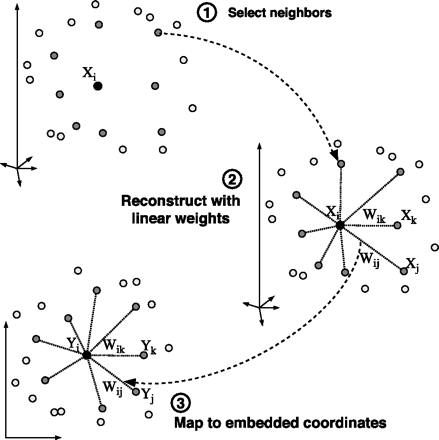

**figure source**: S. T. Roweis and L. K. Saul. Nonlinear dimensionality reduction by locally linear embedding

**Input**: Data vectors \\(x1,...,xn∈Rd\\) with parameters \\(k\\) (nearest neighbors) and \\(m\\) (embedding dimension)

**Output**: Lower dimensional embedding vectors \\(yi,...,yn∈Rm\\) with \\(m<d\\)

Steps:
1. Find \\(k\\) nearest neighbors for each \\(xi\\)
2. Solve for weights \\(W\\) to reconstruct each \\(xi\\) as a linear combination of neighbors
3. Solve for lower dimensional embedding coordinates \\(yi∈Rm\\) that preserve local linear relationships

### Now as the algorithm is explained briefly, let us understand that why are we using this with images?

* The SMOTE algorithm comes with the assumption that any oversampling of
the minority class in the original input space is
restricted by an assumption that the local space
between any pair of positive data points is positive.
However, this strict assumption is not always true
when the original data is not linearly separable.

* In order to relax this assumption, the LLE technique can
be applied to mapping the original data into a new
linearly separable feature space.

* Then the SMOTE algorithm oversamples the minority class in the new
feature space instead. A significant advantage of LLE
over the other state-of-the-art learning algorithms is
that a new synthetic vector z generated in the new
feature space can be mapped back to the original input.

This is so true in case of images as they exist in high dimensions (high resolution).

Reference: J. Wang, M. Xu, H. Wang and J. Zhang, "Classification of Imbalanced Data by Using the SMOTE Algorithm and Locally Linear Embedding," 2006 8th international Conference on Signal Processing, Beijing, 2006, pp. , doi: 10.1109/ICOSP.2006.345752.


In [22]:
import os
from tqdm import tqdm
import cv2
import skimage
from skimage.transform import resize
import numpy as np

In [10]:
#mounting the drive to import images
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Note: The images being used are very random.

In [20]:
# writing few lines of code to import images
DATA_DIR = '/content/gdrive/My Drive/ Balanced Preprocessed/'
from skimage.color import rgb2gray
# train_dir = "Chest Xray Preprocessed/"
def get_data(folder):
    X= []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['0']:
                label = 0
            elif folderName in ['1']:
                label = 1
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                img_file = skimage.transform.resize(img_file, (256,256,1))
                # img_file = cv2.resize(img_file, (256, 256), interpolation = cv2.INTER_LINEAR) 
                img_arr = np.asarray(img_file)
                X.append(img_arr)
                y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

In [23]:
X, y = get_data(DATA_DIR)

100%|██████████| 500/500 [04:36<00:00,  1.81it/s]


In [ ]:
#Installing the smote variants package
!pip install smote-variants

In [25]:
import smote_variants as sv
oversampler= sv.MulticlassOversampling(sv.LLE_SMOTE())
X_samp, y_samp= oversampler.sample(X.reshape(X.shape[0], -1), y.ravel())

2020-10-10 18:36:14,265:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-10-10 18:36:14,559:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-10-10 18:36:14,795:INFO:LLE_SMOTE: Running sampling via ('LLE_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_components': 2, 'n_jobs': 1, 'random_state': None}")


In [26]:
#converting back to the original shape
X_samp = X_samp.reshape(X_samp.shape[0], 256, 256, 1)

In [35]:
#sanity check before going forward
print(X.shape)
print(X_samp.shape)

(625, 256, 256, 1)
(1000, 256, 256, 1)


So as you can see above, initially we had 625 images and after oversampling we have got 1000 images. Also, in the below cell we can see that the number of examples pertaining to each class has also changed. 

Note: We have used the proportion parameter as 1.

In [36]:
print(np.unique(y, return_counts=True))
print(np.unique(y_samp, return_counts=True))

(array([0, 1]), array([500, 125]))
(array([0, 1]), array([500, 500]))


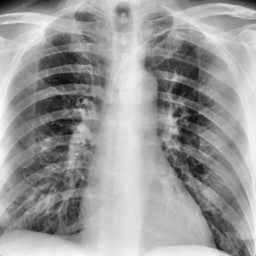

In [33]:
# Visualizing the base images
from keras.preprocessing.image import array_to_img
b=array_to_img(X[624])
b

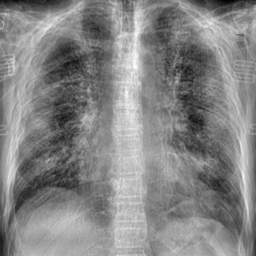

In [34]:
#visualising oversampled images 
b=array_to_img(X_samp[700])
b